In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Data Preparation

In [2]:
path = Path("crypto_data.csv")
df = pd.read_csv(path)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
df = df[df['IsTrading']==True]
#drop the IsTrading column from the dataframe.
df = df.drop(columns=['IsTrading'])
#Remove all rows that have at least one null value.
df = df.dropna(how='any',axis=0)
#TotalCoinsMined > 0
df = df[df['TotalCoinsMined']>0]
#delete the CoinName
df = df.drop(columns=['CoinName'])
df = df.drop(columns=['Unnamed: 0'])
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [4]:
algorithms = {}
algorithmsList = df['Algorithm'].unique().tolist()
for i in range(len(algorithmsList)):
    algorithms[algorithmsList[i]] = i

proofType = {}
proofTypeList = df['ProofType'].unique().tolist()
for i in range(len(proofTypeList)):
    proofType[proofTypeList[i]] = i

df = df.replace(({'Algorithm':algorithms}))
df = df.replace(({'ProofType':proofType}))
df.dtypes

Algorithm            int64
ProofType            int64
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [5]:
# Standarize data with StandarScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['TotalCoinsMined', 'TotalCoinSupply']])
df1 = pd.DataFrame(scaled_data, columns=df.columns[2:])
df1['Algorithm']=df['Algorithm'].values
df1['ProofType']=df['ProofType'].values
df1

,TotalCoinsMined,TotalCoinSupply,Algorithm,ProofType
0,-0.117108,-0.152870,0,0
1,-0.093970,-0.145009,0,0
2,0.524946,4.489424,1,0
3,-0.116715,-0.152560,2,1
4,-0.114747,-0.152870,3,1
...,...,...,...,...
527,-0.073251,-0.123317,2,10
528,-0.116781,-0.149176,0,0
529,-0.095613,-0.132179,18,1
530,-0.116948,-0.152560,6,1


## Dimensionality Reduction

In [6]:
#PCA
pca = PCA(n_components=.99)

In [7]:
df_pca = pca.fit_transform(df1)

In [18]:
df_pca = pd.DataFrame(
    data=df_pca, columns=["principal component 1", "principal component 2"]
)
df_pca.head()

,principal component 1,principal component 2
0,-10.802869,-0.909429
1,-10.802599,-0.908453
2,-9.765501,-0.829928
3,-8.750917,-0.022963
4,-7.752489,-0.078472


In [19]:
pca.explained_variance_ratio_.sum()

0.9931101998659494

## Cluster Analysis with k-Means

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


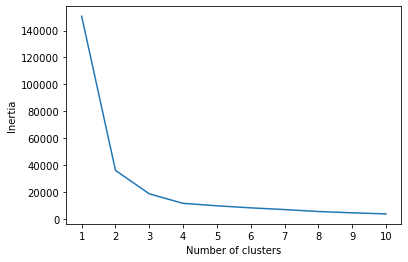

In [20]:
#Create an elbow plot
inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=1234)
    km.fit(df1)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
df_pca = pd.DataFrame(
    data=df_pca,
    columns=["principal component 1", "principal component 2"],
)
df_pca.head()

,principal component 1,principal component 2
0,-10.802869,-0.909429
1,-10.802599,-0.908453
2,-9.765501,-0.829928
3,-8.750917,-0.022963
4,-7.752489,-0.078472


In [24]:
# Initialize the K-Means model
model = KMeans(n_clusters=2, random_state=1234)

# Fit the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)

# Add the predicted class columns
df_pca["class"] = model.labels_
df_pca.head()

,principal component 1,principal component 2,class
0,-10.802869,-0.909429,1
1,-10.802599,-0.908453,1
2,-9.765501,-0.829928,1
3,-8.750917,-0.022963,1
4,-7.752489,-0.078472,1


In [31]:
df1
model.fit(df1)

# Predict clusters
predictions = model.predict(df1)
df2 = df1
# Add the predicted class columns
df2["class"] = model.labels_

df3 = df2.drop(['class'], axis=1)
labels = df2['class']
df3

,TotalCoinsMined,TotalCoinSupply,Algorithm,ProofType
0,-0.117108,-0.152870,0,0
1,-0.093970,-0.145009,0,0
2,0.524946,4.489424,1,0
3,-0.116715,-0.152560,2,1
4,-0.114747,-0.152870,3,1
...,...,...,...,...
527,-0.073251,-0.123317,2,10
528,-0.116781,-0.149176,0,0
529,-0.095613,-0.132179,18,1
530,-0.116948,-0.152560,6,1


In [32]:
# TSNE
tsne = TSNE(learning_rate=35)

In [33]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df3)

In [34]:
tsne_features.shape

(532, 2)

In [35]:
# Prepare to plot the dataset

# The first column of transformed features
df3['x'] = tsne_features[:,0]

# The second column of transformed features
df3['y'] = tsne_features[:,1]

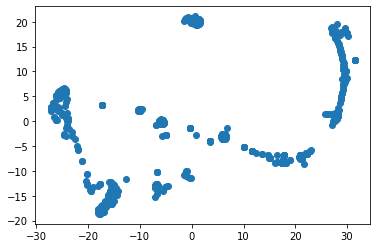

In [36]:
# Visualize the clusters
plt.scatter(df3['x'], df3['y'])
plt.show()

In [37]:
labels.value_counts()

1    441
0     91
Name: class, dtype: int64

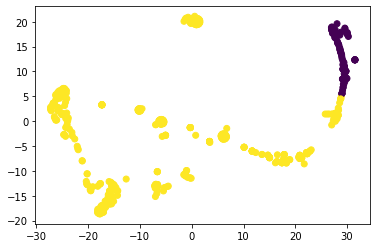

In [38]:
# Visualize the clusters with color
plt.scatter(df3['x'], df3['y'], c=labels)
plt.show()